In [0]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# PCA y SMOTE

In [4]:
data_pulsar.head() ##Visualización de los datos

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_pulsar)
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)

X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

In [0]:
#Split de los datos
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val, y_train_sca, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

In [7]:
#https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
#SMOTE
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE()
X_train, y_train = smt.fit_resample(X_train_sca, y_train_sca)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [8]:
y_train_sca.value_counts()

0    11020
1     1150
Name: is_pulsar, dtype: int64

In [32]:
y_smote = pd.Series(y_train)
y_smote.value_counts()

1    11020
0    11020
dtype: int64

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
pca_cargas = pca.components_
pca_cargas

array([[ 9.84201454e-02,  1.93447097e-03, -4.10538143e-03,
        -1.34482282e-02, -2.11216442e-01, -1.83440878e-01,
         4.53254652e-02,  9.53831581e-01],
       [-1.32684952e-01,  4.38520003e-02,  5.12126284e-03,
         1.34915300e-02,  8.80001110e-01,  3.56997012e-01,
        -2.76801011e-02,  2.78654713e-01],
       [ 9.58265806e-01,  1.72054140e-01, -3.41426369e-02,
        -1.49620111e-01,  1.55665681e-01,  8.31116200e-03,
        -1.73270809e-03, -6.53317576e-02],
       [-6.72125898e-02,  4.86733077e-02, -1.40190052e-03,
         1.37092410e-02,  3.86293665e-01, -9.13264325e-01,
         4.85676907e-02, -8.53822262e-02],
       [-2.04201500e-01,  9.16879697e-01, -2.76704383e-02,
        -3.31102179e-01, -8.15133071e-02,  2.42730337e-02,
        -2.04143864e-03,  1.13832871e-03],
       [ 8.86249356e-02,  3.54049143e-01,  1.03842340e-01,
         9.24580628e-01, -2.57822671e-02,  1.41109121e-02,
        -1.72143023e-02,  1.44263670e-03],
       [ 2.61815803e-03, -7.198150

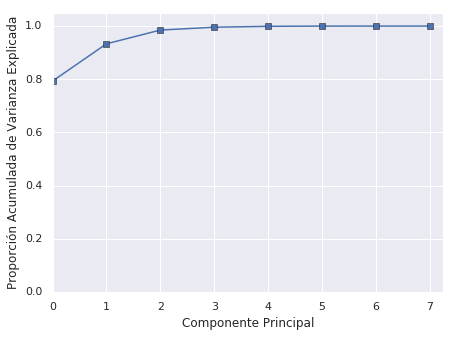

In [10]:
# Se obtiene la grafica de la PVE para los 8 componentes principales
plt.figure(figsize=(7,5))
plt.plot(range(0,8),np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0,7.25)
plt.ylim(0,1.05)
plt.xticks(range(0,8,1))
plt.show()

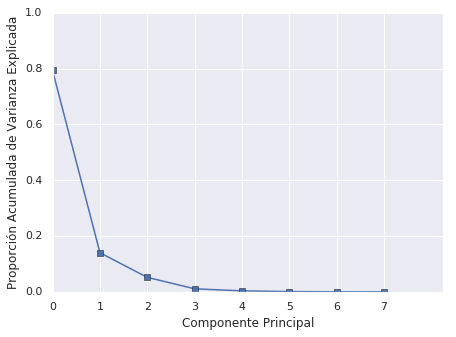

In [11]:
plt.figure(figsize=(7,5))
plt.plot(range(0,8),pca.explained_variance_ratio_, '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,8.25)
plt.ylim(0,1)
plt.xticks(range(0,8,1))
plt.show()

In [12]:
#Del analisis solo nos quedamos con los pesos que nos dan las 3 componentes principales
pesos_nuevo_espacio = pca_cargas[0:3]
pesos_nuevo_espacio

array([[ 0.09842015,  0.00193447, -0.00410538, -0.01344823, -0.21121644,
        -0.18344088,  0.04532547,  0.95383158],
       [-0.13268495,  0.043852  ,  0.00512126,  0.01349153,  0.88000111,
         0.35699701, -0.0276801 ,  0.27865471],
       [ 0.95826581,  0.17205414, -0.03414264, -0.14962011,  0.15566568,
         0.00831116, -0.00173271, -0.06533176]])

In [13]:
Z_train_npa = pca.transform(X_train)[:,:3]
Z_train =pd.DataFrame(Z_train_npa)
Z_train.head()

,0,1,2
0,97.826098,-5.914251,17.753972
1,103.202329,-2.505288,1.374154
2,65.843069,-16.481729,26.147010
3,-23.725292,-32.835047,27.026462
4,34.274482,-20.583422,4.218009


# CLASIFICACION DATA CON MENOS CARACTERISTICAS


## Algoritmo: Redes Neuronales por defecto

Error MSE:  0.0441016333938294


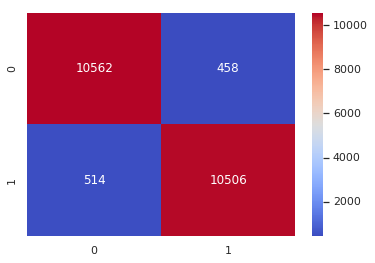

In [14]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()

NN_model.fit(Z_train, y_train) 
y_train_predict= NN_model.predict(Z_train)

from sklearn.metrics import mean_squared_error
NN_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",NN_model_mse)

from sklearn.metrics import confusion_matrix
NN_model_cm = confusion_matrix(y_train, y_train_predict)   

sns.heatmap(NN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9558983666061706
precision 0.9582269244801167
recall 0.9533575317604356
f1score 0.9557860262008734


### Evaluación con data de validacion

In [16]:
Z_val_npa = pca.transform(X_val)[:,:3]
Z_val =pd.DataFrame(Z_val_npa)
Z_val.head()

,0,1,2
0,105.136080,-3.188815,2.604052
1,147.460038,7.999465,3.058946
2,-15.199031,-30.298769,23.398205
3,-93.058825,96.519511,98.210976
4,74.851472,-12.684746,17.969530


Error MSE:  0.05027932960893855


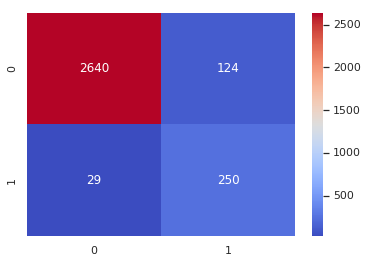

In [17]:
y_val_predict= NN_model.predict(Z_val)

NN_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",NN_model_mse_val)

NN_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(NN_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [18]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9497206703910615
precision 0.6684491978609626
recall 0.8960573476702509
f1score 0.7656967840735069


## Algoritmo: SVM por defecto

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Error MSE:  0.009891107078039927


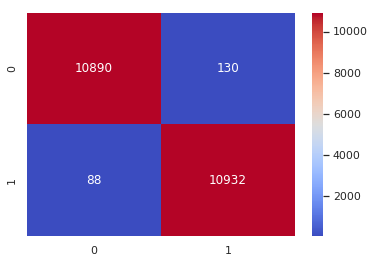

In [19]:
from sklearn.svm import SVC

SVC_model = SVC()
SVC_model.fit(Z_train, y_train)
y_train_predict= SVC_model.predict(Z_train)


SVC_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",SVC_model_mse)

SVC_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(SVC_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [20]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.99010889292196
precision 0.9882480564093292
recall 0.9920145190562614
f1score 0.9901277058237479


### Evaluación con data de validacion

Error MSE:  0.07426881367071969


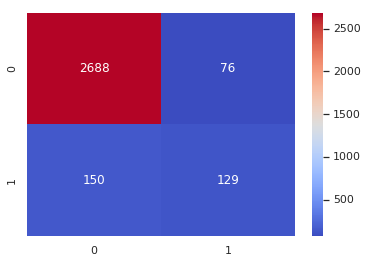

In [21]:
y_val_predict= SVC_model.predict(Z_val)

SVC_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",SVC_model_mse_val)

SVC_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(SVC_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [22]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9257311863292803
precision 0.6292682926829268
recall 0.46236559139784944
f1score 0.5330578512396694


## Algoritmo: Random Forest por defecto

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Error MSE:  0.0027676950998185117


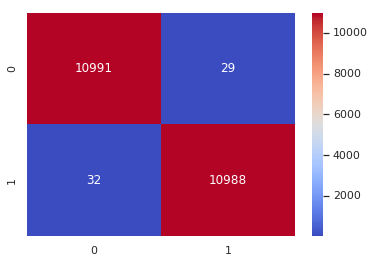

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(Z_train, y_train)
y_train_predict= RF_model.predict(Z_train)


RF_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",RF_model_mse)

RF_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(RF_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [24]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9972323049001814
precision 0.9973677044567487
recall 0.9970961887477314
f1score 0.9972319281208876


### Evaluación con data de validación





Error MSE:  0.04206375287545186


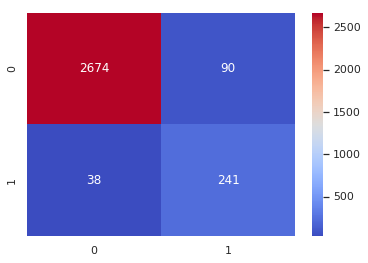

In [25]:
y_val_predict= RF_model.predict(Z_val)

RF_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",RF_model_mse_val)

RF_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(RF_model_cm_val,annot=True, fmt="d", cmap="coolwarm");

In [26]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9579362471245482
precision 0.7280966767371602
recall 0.8637992831541219
f1score 0.7901639344262296


## Algoritmo: KNN por defecto

Error MSE:  0.02295825771324864


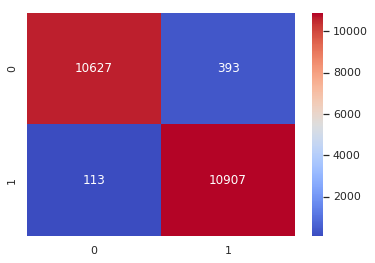

In [27]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(Z_train, y_train)
y_train_predict= KNN_model.predict(Z_train)


KNN_model_mse = mean_squared_error(y_train, y_train_predict)  
print("Error MSE: ",KNN_model_mse)

KNN_model_cm = confusion_matrix(y_train, y_train_predict)   
sns.heatmap(KNN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [28]:
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1score = f1_score(y_train, y_train_predict)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9770417422867513
precision 0.9652212389380531
recall 0.9897459165154265
f1score 0.9773297491039425


### Evaluación con data de validación

Error MSE:  0.05652316792638843


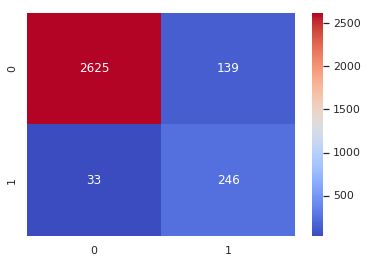

In [29]:
y_val_predict= KNN_model.predict(Z_val)

KNN_model_mse_val = mean_squared_error(y_val, y_val_predict)  
print("Error MSE: ",KNN_model_mse_val)

KNN_model_cm_val = confusion_matrix(y_val, y_val_predict) 

sns.heatmap(KNN_model_cm_val,annot=True, fmt="d", cmap="coolwarm")

In [30]:
accuracy = accuracy_score(y_val, y_val_predict) 
precision = precision_score(y_val, y_val_predict) 
recall = recall_score(y_val, y_val_predict) 
f1score = f1_score(y_val, y_val_predict) 
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)
print("f1score",f1score)

accuracy 0.9434768320736115
precision 0.638961038961039
recall 0.8817204301075269
f1score 0.7409638554216866
